# Bayesian Neural Networks

Neural networks are powerful approximators. However, standard approaches for learning this approximators does not take into account the inherent uncertainty we may have when fitting a model. 

In [1]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import inferpy as inf
import tensorflow_probability as tfp


## Data

We use some fake data. As neural nets of even one hidden layer 
can be universal function approximators, we can see if we can 
train a simple neural network to fit a noisy sinusoidal data, like this:
    

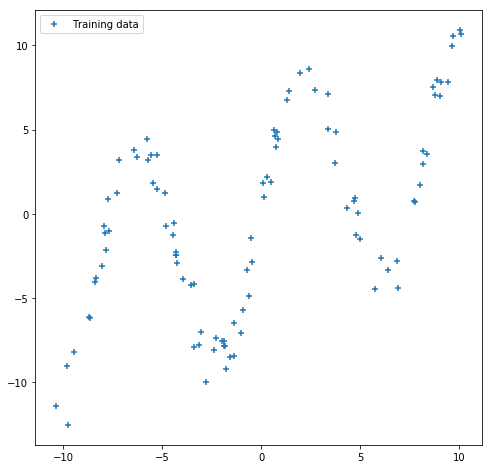

In [2]:
NSAMPLE = 100
x_train = np.float32(np.random.uniform(-10.5, 10.5, (1, NSAMPLE))).T
r_train = np.float32(np.random.normal(size=(NSAMPLE,1),scale=1.0))
y_train = np.float32(np.sin(0.75*x_train)*7.0+x_train*0.5+r_train*1.0)

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.legend();

## Learning Standard Neural Networks

We employ a simple feedforward network with 20 hidden units to learn the model.


In [3]:
NHIDDEN = 20

nnetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(NHIDDEN, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1)
]) 

lossfunc = lambda y_out, y: tf.nn.l2_loss(y_out-y)

nnetwork.compile(tf.train.AdamOptimizer(0.01), lossfunc)
nnetwork.fit(x=x_train, y=y_train, epochs=1000)

Epoch 1/1000
100/100 [==============================] - 0s 2ms/sample - loss: 369.0472
Epoch 2/1000
100/100 [==============================] - 0s 110us/sample - loss: 333.4858
Epoch 3/1000
100/100 [==============================] - 0s 58us/sample - loss: 339.3102
Epoch 4/1000
100/100 [==============================] - 0s 53us/sample - loss: 326.8042
Epoch 5/1000
100/100 [==============================] - 0s 80us/sample - loss: 316.1234
Epoch 6/1000
100/100 [==============================] - 0s 79us/sample - loss: 314.8882
Epoch 7/1000
100/100 [==============================] - 0s 81us/sample - loss: 306.9522
Epoch 8/1000
100/100 [==============================] - 0s 78us/sample - loss: 310.7217
Epoch 9/1000
100/100 [==============================] - 0s 120us/sample - loss: 308.0247
Epoch 10/1000
100/100 [==============================] - 0s 94us/sample - loss: 316.2697
Epoch 11/1000
100/100 [==============================] - 0s 130us/sample - loss: 292.1716
Epoch 12/1000
100/100 [=====

100/100 [==============================] - 0s 101us/sample - loss: 213.3609
Epoch 94/1000
100/100 [==============================] - 0s 84us/sample - loss: 212.9353
Epoch 95/1000
100/100 [==============================] - 0s 59us/sample - loss: 212.4080
Epoch 96/1000
100/100 [==============================] - 0s 43us/sample - loss: 208.8221
Epoch 97/1000
100/100 [==============================] - 0s 42us/sample - loss: 211.9194
Epoch 98/1000
100/100 [==============================] - 0s 50us/sample - loss: 204.6377
Epoch 99/1000
100/100 [==============================] - 0s 43us/sample - loss: 200.5136
Epoch 100/1000
100/100 [==============================] - 0s 48us/sample - loss: 212.2048
Epoch 101/1000
100/100 [==============================] - 0s 68us/sample - loss: 209.8040
Epoch 102/1000
100/100 [==============================] - 0s 37us/sample - loss: 196.7627
Epoch 103/1000
100/100 [==============================] - 0s 51us/sample - loss: 192.1595
Epoch 104/1000
100/100 [======

100/100 [==============================] - 0s 55us/sample - loss: 154.0468
Epoch 185/1000
100/100 [==============================] - 0s 73us/sample - loss: 155.2327
Epoch 186/1000
100/100 [==============================] - 0s 44us/sample - loss: 151.5613
Epoch 187/1000
100/100 [==============================] - 0s 41us/sample - loss: 152.8065
Epoch 188/1000
100/100 [==============================] - 0s 77us/sample - loss: 156.5222
Epoch 189/1000
100/100 [==============================] - 0s 37us/sample - loss: 154.8056
Epoch 190/1000
100/100 [==============================] - 0s 48us/sample - loss: 150.8022
Epoch 191/1000
100/100 [==============================] - 0s 51us/sample - loss: 151.8768
Epoch 192/1000
100/100 [==============================] - 0s 41us/sample - loss: 156.8632
Epoch 193/1000
100/100 [==============================] - 0s 46us/sample - loss: 148.5792
Epoch 194/1000
100/100 [==============================] - 0s 62us/sample - loss: 159.6263
Epoch 195/1000
100/100 [=

100/100 [==============================] - 0s 40us/sample - loss: 127.1625
Epoch 276/1000
100/100 [==============================] - 0s 46us/sample - loss: 122.0950
Epoch 277/1000
100/100 [==============================] - 0s 65us/sample - loss: 125.8803
Epoch 278/1000
100/100 [==============================] - 0s 46us/sample - loss: 126.2178
Epoch 279/1000
100/100 [==============================] - 0s 62us/sample - loss: 124.4887
Epoch 280/1000
100/100 [==============================] - 0s 41us/sample - loss: 124.2431
Epoch 281/1000
100/100 [==============================] - 0s 42us/sample - loss: 113.4592
Epoch 282/1000
100/100 [==============================] - 0s 73us/sample - loss: 123.8012
Epoch 283/1000
100/100 [==============================] - 0s 44us/sample - loss: 122.5373
Epoch 284/1000
100/100 [==============================] - 0s 42us/sample - loss: 114.3618
Epoch 285/1000
100/100 [==============================] - 0s 72us/sample - loss: 122.4782
Epoch 286/1000
100/100 [=

100/100 [==============================] - 0s 38us/sample - loss: 100.0477
Epoch 367/1000
100/100 [==============================] - 0s 70us/sample - loss: 98.5082
Epoch 368/1000
100/100 [==============================] - 0s 41us/sample - loss: 93.2900
Epoch 369/1000
100/100 [==============================] - 0s 40us/sample - loss: 102.0505
Epoch 370/1000
100/100 [==============================] - 0s 68us/sample - loss: 93.8770
Epoch 371/1000
100/100 [==============================] - 0s 37us/sample - loss: 103.9970
Epoch 372/1000
100/100 [==============================] - 0s 59us/sample - loss: 101.3089
Epoch 373/1000
100/100 [==============================] - 0s 57us/sample - loss: 102.3893
Epoch 374/1000
100/100 [==============================] - 0s 59us/sample - loss: 102.6854
Epoch 375/1000
100/100 [==============================] - 0s 92us/sample - loss: 101.1845
Epoch 376/1000
100/100 [==============================] - 0s 70us/sample - loss: 100.3618
Epoch 377/1000
100/100 [====

100/100 [==============================] - 0s 39us/sample - loss: 93.1680
Epoch 458/1000
100/100 [==============================] - 0s 43us/sample - loss: 93.5055
Epoch 459/1000
100/100 [==============================] - 0s 62us/sample - loss: 85.9359
Epoch 460/1000
100/100 [==============================] - 0s 43us/sample - loss: 84.2402
Epoch 461/1000
100/100 [==============================] - 0s 57us/sample - loss: 92.0971
Epoch 462/1000
100/100 [==============================] - 0s 55us/sample - loss: 85.1040
Epoch 463/1000
100/100 [==============================] - 0s 40us/sample - loss: 90.6851
Epoch 464/1000
100/100 [==============================] - 0s 67us/sample - loss: 90.5338
Epoch 465/1000
100/100 [==============================] - 0s 40us/sample - loss: 86.6031
Epoch 466/1000
100/100 [==============================] - 0s 36us/sample - loss: 87.1134
Epoch 467/1000
100/100 [==============================] - 0s 62us/sample - loss: 89.4818
Epoch 468/1000
100/100 [============

Epoch 549/1000
100/100 [==============================] - 0s 101us/sample - loss: 87.7848
Epoch 550/1000
100/100 [==============================] - 0s 43us/sample - loss: 80.7022
Epoch 551/1000
100/100 [==============================] - 0s 67us/sample - loss: 79.2113
Epoch 552/1000
100/100 [==============================] - 0s 85us/sample - loss: 85.3757
Epoch 553/1000
100/100 [==============================] - 0s 58us/sample - loss: 88.2310
Epoch 554/1000
100/100 [==============================] - 0s 51us/sample - loss: 87.4715
Epoch 555/1000
100/100 [==============================] - 0s 48us/sample - loss: 87.2346
Epoch 556/1000
100/100 [==============================] - 0s 73us/sample - loss: 85.8527
Epoch 557/1000
100/100 [==============================] - 0s 52us/sample - loss: 87.4488
Epoch 558/1000
100/100 [==============================] - 0s 73us/sample - loss: 87.3884
Epoch 559/1000
100/100 [==============================] - 0s 47us/sample - loss: 87.7227
Epoch 560/1000
100/1

100/100 [==============================] - 0s 56us/sample - loss: 84.7639
Epoch 642/1000
100/100 [==============================] - 0s 37us/sample - loss: 83.0029
Epoch 643/1000
100/100 [==============================] - 0s 65us/sample - loss: 84.6525
Epoch 644/1000
100/100 [==============================] - 0s 52us/sample - loss: 84.2585
Epoch 645/1000
100/100 [==============================] - 0s 53us/sample - loss: 83.9913
Epoch 646/1000
100/100 [==============================] - 0s 53us/sample - loss: 81.6178
Epoch 647/1000
100/100 [==============================] - 0s 39us/sample - loss: 78.9475
Epoch 648/1000
100/100 [==============================] - 0s 43us/sample - loss: 84.4575
Epoch 649/1000
100/100 [==============================] - 0s 52us/sample - loss: 84.2403
Epoch 650/1000
100/100 [==============================] - 0s 55us/sample - loss: 84.4828
Epoch 651/1000
100/100 [==============================] - 0s 73us/sample - loss: 77.2745
Epoch 652/1000
100/100 [============

100/100 [==============================] - 0s 61us/sample - loss: 80.8694
Epoch 734/1000
100/100 [==============================] - 0s 44us/sample - loss: 79.2136
Epoch 735/1000
100/100 [==============================] - 0s 46us/sample - loss: 83.5108
Epoch 736/1000
100/100 [==============================] - 0s 64us/sample - loss: 82.9260
Epoch 737/1000
100/100 [==============================] - 0s 51us/sample - loss: 83.2742
Epoch 738/1000
100/100 [==============================] - 0s 58us/sample - loss: 79.6137
Epoch 739/1000
100/100 [==============================] - 0s 41us/sample - loss: 83.3730
Epoch 740/1000
100/100 [==============================] - 0s 37us/sample - loss: 80.5058
Epoch 741/1000
100/100 [==============================] - 0s 39us/sample - loss: 80.2129
Epoch 742/1000
100/100 [==============================] - 0s 65us/sample - loss: 83.6303
Epoch 743/1000
100/100 [==============================] - 0s 36us/sample - loss: 83.3623
Epoch 744/1000
100/100 [============

100/100 [==============================] - 0s 48us/sample - loss: 82.6626
Epoch 826/1000
100/100 [==============================] - 0s 42us/sample - loss: 81.7376
Epoch 827/1000
100/100 [==============================] - 0s 60us/sample - loss: 77.6796
Epoch 828/1000
100/100 [==============================] - 0s 52us/sample - loss: 77.1756
Epoch 829/1000
100/100 [==============================] - 0s 58us/sample - loss: 72.6636
Epoch 830/1000
100/100 [==============================] - 0s 43us/sample - loss: 82.4669
Epoch 831/1000
100/100 [==============================] - 0s 38us/sample - loss: 83.1056
Epoch 832/1000
100/100 [==============================] - 0s 49us/sample - loss: 82.0998
Epoch 833/1000
100/100 [==============================] - 0s 47us/sample - loss: 76.0634
Epoch 834/1000
100/100 [==============================] - 0s 42us/sample - loss: 82.7291
Epoch 835/1000
100/100 [==============================] - 0s 47us/sample - loss: 81.6127
Epoch 836/1000
100/100 [============

100/100 [==============================] - 0s 106us/sample - loss: 81.1431
Epoch 918/1000
100/100 [==============================] - 0s 55us/sample - loss: 75.4924
Epoch 919/1000
100/100 [==============================] - 0s 83us/sample - loss: 81.1628
Epoch 920/1000
100/100 [==============================] - 0s 64us/sample - loss: 81.7880
Epoch 921/1000
100/100 [==============================] - 0s 78us/sample - loss: 78.8892
Epoch 922/1000
100/100 [==============================] - 0s 65us/sample - loss: 77.2605
Epoch 923/1000
100/100 [==============================] - 0s 86us/sample - loss: 81.5502
Epoch 924/1000
100/100 [==============================] - 0s 47us/sample - loss: 82.3234
Epoch 925/1000
100/100 [==============================] - 0s 46us/sample - loss: 78.6496
Epoch 926/1000
100/100 [==============================] - 0s 83us/sample - loss: 82.1787
Epoch 927/1000
100/100 [==============================] - 0s 54us/sample - loss: 80.3900
Epoch 928/1000
100/100 [===========

We see that the neural network can fit this sinusoidal data quite well, as expected. 

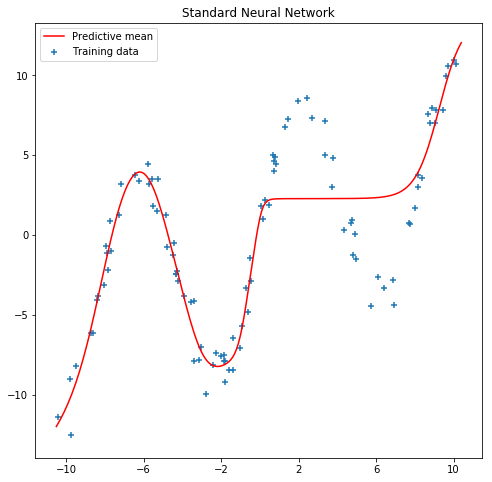

In [4]:
sess = tf.keras.backend.get_session()
x_test = np.float32(np.arange(-10.5,10.5,0.1))
x_test = x_test.reshape(x_test.size,1)
y_test = sess.run(nnetwork(x_test))

plt.figure(figsize=(8, 8))
plt.plot(x_test, y_test, 'r-', label='Predictive mean');
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.xticks(np.arange(-10., 10.5, 4))
plt.title('Standard Neural Network')
plt.legend();

However, the model uncertainty is not appropriately captured. For example, when making predictions about a 
single point (e.g. around x=2.0), we can see we do not have into account the inherent noise there is in the prediction.
In the next section, we will what happen when we introduce a Bayesian approach using InferPy. 

## Learning Bayesian Neural Networks

[Bayesian modeling](http://mlg.eng.cam.ac.uk/zoubin/papers/NatureReprint15.pdf) offers a systematic framework for reasoning about model uncertainty. Instead of just learning point estimates, we're going to learn a distribution over variables that are consistent with the observed data.

In Bayesian learning, the weights of the network are `random variables`. The output of the nework is another `random variable` which is the one that implicitlyl defines the ``loss function``. So, when making Bayesian learning we do not define ``loss functions``, we do define ``random variables``. For more information you can check [this talk](https://www.cs.ox.ac.uk/people/yarin.gal/website/PDFs/2017_OReilly_talk.pdf) and this [paper](https://arxiv.org/abs/1908.03442).

In [Inferpy](https://inferpy.readthedocs.io), defining a Bayesian neural network is quite straightforward. First we 
define the neural network using ``inf.layers.Sequential`` and layers of class ``tfp.layers.DenseFlipout``. Second, the input `x` and output `y` are also defined as random variables. More precisely, the output `y` is defined as a Gaussian random varible. The mean of the Gaussian is the output of the neural network.

In [5]:
@inf.probmodel
def model(NHIDDEN):

    with inf.datamodel():
        x = inf.Normal(loc = tf.zeros([1]), scale = 1.0, name="x")
        
        nnetwork = inf.layers.Sequential([
            tfp.layers.DenseFlipout(NHIDDEN, activation=tf.nn.tanh),
            tfp.layers.DenseFlipout(1)
        ]) 
        
        y = inf.Normal(loc = nnetwork(x) , scale= 1., name="y")

To perform Bayesian learning, we resort to the scalable variational methods available in InferPy, 
which require the definition of a `q` model. For details, see the documentation 
about [Inference in Inferpy](https://inferpy.readthedocs.io/projects/develop/en/develop/notes/guideinference.html). 
For a deeper theoretical despcription, read this [paper](https://arxiv.org/abs/1908.03442). In this case, the q 
variables approximating the NN are defined in a transparent manner. For that reason we define an empty q model.

In [6]:
@inf.probmodel
def qmodel():
    pass


In [7]:
NHIDDEN=20

p = model(NHIDDEN)
q = qmodel()

VI = inf.inference.VI(q, optimizer = tf.train.AdamOptimizer(0.01), epochs=5000)

p.fit({"x": x_train, "y": y_train}, VI)


 0 epochs	 3477.63818359375....................
 200 epochs	 2621.487548828125....................
 400 epochs	 2294.40478515625....................
 600 epochs	 2003.2978515625....................
 800 epochs	 1932.5308837890625....................
 1000 epochs	 1912.515625....................
 1200 epochs	 1909.4072265625....................
 1400 epochs	 1908.7269287109375....................
 1600 epochs	 1908.28564453125....................
 1800 epochs	 1909.939697265625....................
 2000 epochs	 1907.779052734375....................
 2200 epochs	 1908.8096923828125....................
 2400 epochs	 1907.308349609375....................
 2600 epochs	 1907.8809814453125....................
 2800 epochs	 1906.529541015625....................
 3000 epochs	 1906.2943115234375....................
 3200 epochs	 1906.744140625....................
 3400 epochs	 1905.798828125....................
 3600 epochs	 1905.2296142578125....................
 3800 epochs	 1905.57275390625.

As can be seen in the next figure, the output of our model is not deterministic. So, we can capture the 
uncertainty in the data. See for example what happens now with the predictions at the point `x=2.0`. See also what 
happens with the uncertainty in out-of-range predictions.

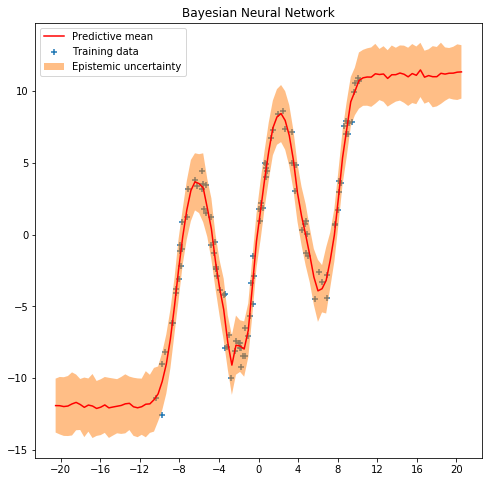

In [8]:
x_test = np.linspace(-20.5, 20.5, NSAMPLE).reshape(-1, 1)

plt.figure(figsize=(8, 8))

y_pred_list = []
for i in range(100):
    y_test = p.posterior_predictive(["y"], data = {"x": x_test}).sample()
    y_pred_list.append(y_test)

y_preds = np.concatenate(y_pred_list, axis=1)

y_mean = np.mean(y_preds, axis=1)
y_sigma = np.std(y_preds, axis=1)

plt.plot(x_test, y_mean, 'r-', label='Predictive mean');
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.fill_between(x_test.ravel(), 
                 y_mean + 2 * y_sigma, 
                 y_mean - 2 * y_sigma, 
                 alpha=0.5, label='Epistemic uncertainty')
plt.xticks(np.arange(-20., 20.5, 4))
plt.title('Bayesian Neural Network')
plt.legend();